# Post processing

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
from matplotlib.lines import Line2D


import matplotlib as mpl
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['figure.figsize']

[6.0, 4.0]

## Plot capacity factors for the location

Text(0.5, 1.0, 'Wind CF =  0.35')

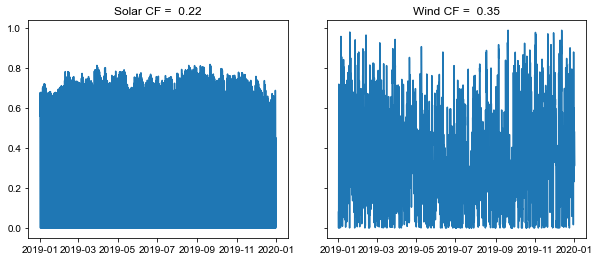

In [13]:

df_solar = pd.read_csv('data/Solar.csv', sep=',', index_col=0,parse_dates=True, skiprows=3 ) # in MWh
CF_solar=df_solar['electricity']
df_wind = pd.read_csv('data/Wind.csv', sep=',', index_col=0,parse_dates=True, skiprows=3 ) # in MWh
CF_wind=df_wind['electricity']
df_solar['load']=100
load=df_solar['load']


fig, axs = plt.subplots(1,2,figsize=(10,4),gridspec_kw={'wspace':0.15,'hspace':0.15}, sharey=True)

axs[0].plot(CF_solar)
axs[0].set_title('Solar CF = % 0.2f' % (np.mean(CF_solar)))


axs[1].plot(CF_wind)
axs[1].set_title('Wind CF = % 0.2f' % (np.mean(CF_wind)))

In [14]:
np.mean(CF_solar)

0.22355764840182651

## Read Data

In [15]:
df=pd.read_csv('Thermal_Storage.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
MoltenS=df.drop_duplicates(subset=['energy','effi','fuel_cost'], keep='last').reset_index()
MoltenS.loc[MoltenS.power<= 101000, 'power'] = np.nan

factorc=0.097
MoltenS.power= MoltenS.power*factorc/MoltenS.effi+ MoltenS.power*(1-factorc)

In [16]:
df=pd.read_csv('LiquidAir_Storage.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
LiquidAirS=df.drop_duplicates(subset=['energy','effi','fuel_cost'], keep='last').reset_index()
LiquidAirS.loc[LiquidAirS.power<= 101000, 'power'] = np.nan

factorc=0.5
LiquidAirS.power= LiquidAirS.power*factorc/LiquidAirS.effi+ LiquidAirS.power*(1-factorc)



df=pd.read_csv('PumpedThermal_Storage.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
PumpedThermalS=df.drop_duplicates(subset=['energy','effi','fuel_cost'], keep='last').reset_index()
PumpedThermalS.loc[PumpedThermalS.power<= 101000, 'power'] = np.nan
factorc=0.33

PumpedThermalS.power= PumpedThermalS.power*factorc/PumpedThermalS.effi+ PumpedThermalS.power*(1-factorc)

df=pd.read_csv('CompressAir_Storage.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
CompressedS=df.drop_duplicates(subset=['energy','effi','fuel_cost'], keep='last').reset_index()
CompressedS.loc[CompressedS.power<= 101000, 'power'] = np.nan

factorc=0.33

CompressedS.power= CompressedS.power*factorc/CompressedS.effi+ CompressedS.power*(1-factorc)

In [17]:
df=pd.read_csv('Battery_Storage.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
BatteryS=df.drop_duplicates(subset=['energy','effi','fuel_cost'], keep='last').reset_index()
BatteryS.loc[BatteryS.power<= 101000, 'power'] = np.nan

factorc=0.5

BatteryS.power= BatteryS.power*factorc/BatteryS.effi+ BatteryS.power*(1-factorc)


df=pd.read_csv('Hydrogen_Storage.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
HydrogenS=df.drop_duplicates(subset=['energy','effi','fuel_cost'], keep='last').reset_index()
HydrogenS.loc[HydrogenS.power<= 101000, 'power'] = np.nan

## Plot cost Curves

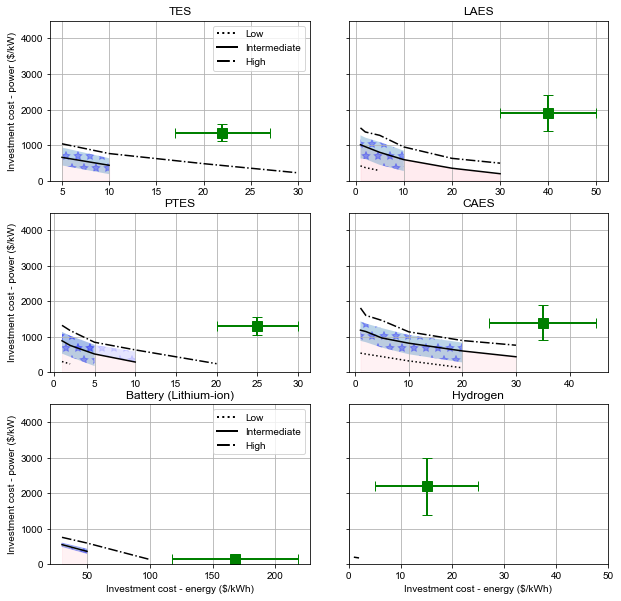

In [19]:
from itertools import cycle
fig, axs = plt.subplots(3,2,figsize=(10,10),gridspec_kw={'wspace':0.15,'hspace':0.2}, sharey=True)


lines = [':', '-', '-.']
linecycler = cycle(lines)


A=MoltenS.loc[MoltenS.fuel_cost==100,:]
p=np.unique(A.effi)
a=A.power[A.effi==p[1]]/1000
y1=A.power[A.effi==p[0]]/1000
y2=A.power[A.effi==p[2]]/1000
x=A.energy[A.effi==p[1]]/1000
axs[0,0].fill_between(x,0,a,alpha=0.2, color='pink')
axs[0,0].fill_between(x,y1,y2,alpha=0.3, hatch="*", edgecolor="b", linewidth=0.0 )


for j in np.unique(MoltenS.fuel_cost):
    A=MoltenS.loc[MoltenS.fuel_cost==j,:]
    p=np.unique(A.effi)
    a=A.power[A.effi==p[1]]/1000
    y1=A.power[A.effi==p[0]]/1000
    y2=A.power[A.effi==p[2]]/1000
    x=A.energy[A.effi==p[1]]/1000
    axs[0,0].plot(x,a,linestyle=next(linecycler),color='black') 
axs[0,0].errorbar(22, 1350,
             yerr = 250,
             xerr = 5,
             fmt ='sg',elinewidth=2, capsize=5,markersize='10')

axs[0,0].set_title('TES')
axs[0,0].set_ylabel('Investment cost - power ($/kW)')
axs[0,0].grid()
linestyle = lines
lines = [Line2D([0], [0], color='black', linewidth=2, linestyle=c) for c in linestyle]
labels = ['Low', 'Intermediate','High',]
axs[0,0].legend(lines, labels)

####################

A=PumpedThermalS.loc[PumpedThermalS.fuel_cost==100,:]
p=np.unique(A.effi)
a=A.power[A.effi==p[1]]/1000
y1=A.power[A.effi==p[0]]/1000
y2=A.power[A.effi==p[2]]/1000
x=A.energy[A.effi==p[1]]/1000
axs[1,0].fill_between(x,0,a,alpha=0.2, color='pink')
axs[1,0].fill_between(x,y1,y2,alpha=0.3, hatch="*", edgecolor="b", linewidth=0.0 )
axs[1,0].fill_between(x,a,y2,alpha=0.1, hatch="*", edgecolor="b", facecolor="b",linewidth=0.0 )
for j in np.unique(PumpedThermalS.fuel_cost):
    A=PumpedThermalS.loc[PumpedThermalS.fuel_cost==j,:]
    p=np.unique(A.effi)
    a=A.power[A.effi==p[1]]/1000
    y1=A.power[A.effi==p[0]]/1000
    y2=A.power[A.effi==p[2]]/1000
    x=A.energy[A.effi==p[1]]/1000
    axs[1,0].plot(x,a,linestyle=next(linecycler),color='black') 

axs[1,0].errorbar(25, 1300,
             yerr = 250,
             xerr = 5,
             fmt ='sg',elinewidth=2, capsize=5,markersize='10')

axs[1,0].set_title('PTES')
axs[1,0].set_ylabel('Investment cost - power ($/kW)')
#axs[1,0].set_xlabel('Investment cost - energy ($/kWh)')
axs[1,0].grid()

#############################################


A=LiquidAirS.loc[LiquidAirS.fuel_cost==100,:]
p=np.unique(A.effi)
a=A.power[A.effi==p[1]]/1000
y1=A.power[A.effi==p[0]]/1000
y2=A.power[A.effi==p[2]]/1000
x=A.energy[A.effi==p[1]]/1000
axs[0,1].fill_between(x,0,a,alpha=0.3,color='pink' )
axs[0,1].fill_between(x,y1,y2,alpha=0.3, hatch="*", edgecolor="b", linewidth=0.0 )

for j in np.unique(LiquidAirS.fuel_cost):
    A=LiquidAirS.loc[LiquidAirS.fuel_cost==j,:]
    p=np.unique(A.effi)
    a=A.power[A.effi==p[1]]/1000
    y1=A.power[A.effi==p[0]]/1000
    y2=A.power[A.effi==p[2]]/1000
    x=A.energy[A.effi==p[1]]/1000   
    axs[0,1].plot(x,a,linestyle=next(linecycler),color='black') 

axs[0,1].errorbar(40, 1900,
             yerr = 500,
             xerr = 10,
             fmt ='sg',elinewidth=2, capsize=5,markersize='10')

axs[0,1].set_title('LAES')
axs[0,1].grid()

#############################################


A=CompressedS.loc[CompressedS.fuel_cost==100,:]
p=np.unique(A.effi)
a=A.power[A.effi==p[1]]/1000
y1=A.power[A.effi==p[0]]/1000
y2=A.power[A.effi==p[2]]/1000
x=A.energy[A.effi==p[1]]/1000
axs[1,1].fill_between(x,0,a,alpha=0.2, color='pink')
axs[1,1].fill_between(x,y1,y2,alpha=0.3, hatch="*", edgecolor="b", linewidth=0.0 )

for j in np.unique(CompressedS.fuel_cost):
    A=CompressedS.loc[CompressedS.fuel_cost==j,:]
    p=np.unique(A.effi)
    a=A.power[A.effi==p[1]]/1000
    y1=A.power[A.effi==p[0]]/1000
    y2=A.power[A.effi==p[2]]/1000
    x=A.energy[A.effi==p[1]]/1000
    axs[1,1].plot(x,a,linestyle=next(linecycler),color='black') 

axs[1,1].errorbar(35, 1400,
             yerr = 500,
             xerr = 10,
             fmt ='sg',elinewidth=2, capsize=5,markersize='10')

axs[1,1].set_title('CAES')
#axs[1,1].set_xlabel('Investment cost - energy($/kWh)')
axs[1,1].grid()


lines = [':', '-', '-.']
linecycler = cycle(lines)

A=BatteryS.loc[BatteryS.fuel_cost==100,:]
p=np.unique(A.effi)
a=A.power[A.effi==p[1]]/1000
y1=A.power[A.effi==p[0]]/1000
y2=A.power[A.effi==p[2]]/1000
x=A.energy[A.effi==p[1]]/1000
axs[2,0].fill_between(x,0,a,alpha=0.2, color='pink')
axs[2,0].fill_between(x,y1,y2,alpha=0.3, hatch="*", edgecolor="b", linewidth=1.0 )


for j in np.unique(BatteryS.fuel_cost):
    A=BatteryS.loc[BatteryS.fuel_cost==j,:]
    p=np.unique(A.effi)
    a=A.power[A.effi==p[1]]/1000
    y1=A.power[A.effi==p[0]]/1000
    y2=A.power[A.effi==p[2]]/1000
    x=A.energy[A.effi==p[1]]/1000
    axs[2,0].plot(x,a,linestyle=next(linecycler),color='black') 
axs[2,0].errorbar(168, 156,
             yerr = 100,
             xerr = 50,
             fmt ='sg',elinewidth=2, capsize=5,markersize='10')

axs[2,0].set_title('Battery (Lithium-ion)')
axs[2,0].set_xlabel('Investment cost - energy ($/kWh)')
axs[2,0].grid()
linestyle = lines
lines = [Line2D([0], [0], color='black', linewidth=2, linestyle=c) for c in linestyle]
labels = ['Low', 'Intermediate','High',]
axs[2,0].legend(lines, labels)
axs[2,0].set_ylabel('Investment cost - power ($/kW)')


#############################################


lines = [':', '-', '-.']
linecycler = cycle(lines)

A=HydrogenS.loc[HydrogenS.fuel_cost==100,:]
p=np.unique(A.effi)
a=A.power[A.effi==p[1]]/1000
y1=A.power[A.effi==p[0]]/1000
y2=A.power[A.effi==p[2]]/1000
x=A.energy[A.effi==p[1]]/1000
axs[2,1].fill_between(x,0,a,alpha=0.2, color='pink')
axs[2,1].fill_between(x,y1,y2,alpha=0.3, hatch="*", edgecolor="b", linewidth=0.0 )
axs[2,1].fill_between(x,a,y2,alpha=0.1, hatch="*", edgecolor="b", facecolor="b",linewidth=0.0 )


for j in np.unique(HydrogenS.fuel_cost):
    A=HydrogenS.loc[HydrogenS.fuel_cost==j,:]
    p=np.unique(A.effi)
    a=A.power[A.effi==p[1]]/1000
    y1=A.power[A.effi==p[0]]/1000
    y2=A.power[A.effi==p[2]]/1000
    x=A.energy[A.effi==p[1]]/1000
    axs[2,1].plot(x,a,linestyle=next(linecycler),color='black') 
axs[2,1].errorbar(15, 2200,
             yerr = 800,
             xerr = 10,
             fmt ='sg',elinewidth=2, capsize=5,markersize='10')

axs[2,1].set_title('Hydrogen')
axs[2,1].set_xlim([0,50])

axs[2,1].grid()
linestyle = lines
lines = [Line2D([0], [0], color='black', linewidth=2, linestyle=c) for c in linestyle]
labels = ['Low', 'Intermediate','High',]

axs[2,1].set_xlabel('Investment cost - energy ($/kWh)')




axs[2,1].set_ylim([0,4500])

plt.savefig("Main10.jpg",dpi=600,bbox_inches='tight')

# Efficiency Plot

In [25]:
df=pd.read_csv('CompressAir_SameEffi.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
Sameeffi=df.drop_duplicates(subset=['energy','dischargeeffi','chargeeffi'], keep='last').reset_index()
Sameeffi.loc[CompressedS.power<= 301000, 'power'] = np.nan
factorc=0.33

Sameeffi.power= Sameeffi.power*factorc/Sameeffi.effi+ Sameeffi.power*(1-factorc)

KeyError: Index(['dischargeeffi'], dtype='object')

In [ ]:
plt.figure(figsize=(5,4))
lines = ['-', ':', '-.','--']
linecycler = cycle(lines)
Sameeffi['dischargeeffi'] = Sameeffi['dischargeeffi'].round(2)

#print(np.unique(Sameeffi['dischargeeffi']))
a=Sameeffi.loc[Sameeffi.dischargeeffi==0.77,:].power/1000
b=Sameeffi.loc[Sameeffi.dischargeeffi==0.71,:].power/1000
c=Sameeffi.loc[Sameeffi.dischargeeffi==0.65,:].power/1000
d=Sameeffi.loc[Sameeffi.dischargeeffi==0.61,:].power/1000
e=Sameeffi.loc[Sameeffi.dischargeeffi==0.55,:].power/1000
f=Sameeffi.loc[Sameeffi.dischargeeffi==0.39,:].power/1000
g=Sameeffi.loc[Sameeffi.dischargeeffi==0.27,:].power/1000


x=Sameeffi.loc[Sameeffi.dischargeeffi==0.77,:].energy/1000

#plt.plot(x,(b.values-a.values)/a.values*100,label='$\eta_{ratio}$ = 1.2')
plt.plot(x,(c.values-a.values)/a.values*100,'--',label='$\eta_{ratio}$ = 1.4',lw=2)
#plt.plot(x,(d.values-a.values)/a.values*100,label='$\eta_{ratio}$ = 1.6')
plt.plot(x,(e.values-a.values)/a.values*100,':',label='$\eta_{ratio}$ = 2',lw=2)
plt.plot(x,(f.values-a.values)/a.values*100,'-.',label='$\eta_{ratio}$ = 4',lw=2)
plt.plot(x,(g.values-a.values)/a.values*100,'-',label='$\eta_{ratio}$ = 8',lw=2)


plt.legend()
plt.grid()
plt.xlabel('Investment cost - energy ($/kWh)')
plt.ylabel('Reduction in investment cost - power (%)')

plt.plot(30,-28,'*', markersize=12)
plt.savefig("SameEfficiency2.jpg",dpi=600,bbox_inches='tight')

In [ ]:
c=0.6/0.38729833
print(c)
c/0.38729833
1.55*39

## Cost ratio Plot

In [10]:
df=pd.read_csv('CompressAir_ChargeDis.csv')
a=np.zeros(len(df.storage))
for i in np.arange(len(df.storage)):
    a[i]=float(df.storage[i].strip("[]"))
df.storage=a
df=df.iloc[1:,]
Fracc=df.drop_duplicates(subset=['energy','costfrac'], keep='last').reset_index()
Fracc.loc[CompressedS.power<= 301000, 'power'] = np.nan

factorc=0.33

Fracc.power= Fracc.power*factorc/Fracc.effi+ Fracc.power*(1-factorc)



[0.097 0.333 0.5   0.6  ]


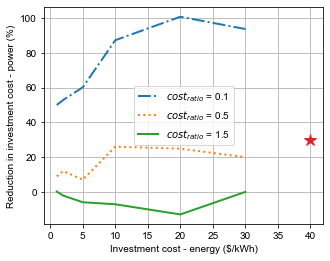

In [11]:
plt.figure(figsize=(5,4))
lines = ['-', ':', '-.','--']
linecycler = cycle(lines)
k=[0.1,0.5,1,1.5]

print(np.unique(Fracc.costfrac))
a=Fracc.loc[Fracc.costfrac==0.5,:].power/1000
b=Fracc.loc[Fracc.costfrac==0.097,:].power/1000
c=Fracc.loc[Fracc.costfrac==0.333,:].power/1000
d=Fracc.loc[Fracc.costfrac==0.6,:].power/1000
x=Fracc.loc[Fracc.costfrac==0.6,:].energy/1000

plt.plot(x,(b.values-a.values)/a.values*100,'-.',label='$cost_{ratio}$ = 0.1',lw=2)
plt.plot(x,(c.values-a.values)/a.values*100,':',label='$cost_{ratio}$ = 0.5',lw=2)
plt.plot(x,(d.values-a.values)/a.values*100,'-',label='$cost_{ratio}$ = 1.5',lw=2)

plt.legend()
plt.grid()
plt.xlabel('Investment cost - energy ($/kWh)')
plt.ylabel('Reduction in investment cost - power (%)')
plt.plot(40,30,'*', markersize=12)

plt.savefig("ChargeDischarge2.jpg",dpi=600,bbox_inches='tight')

## Storage duration and optimum charge discharge TMES

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10,8))

fuel_cost=100
A=MoltenS.loc[MoltenS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
print(p)
a=(A['storage']/A['discharge'])[A.effi==p[1]]
y1=(A['storage']/A['discharge'])[A.effi==p[0]]
y2=(A['storage']/A['discharge'])[A.effi==p[2]]
x=A.energy[A.effi==p[1]]/1000
axs[0,0].plot(x,a)
axs[0,0].fill_between(x,y1,y2,alpha=0.2, label='Storage duration')

a=A['charge'][A.effi==p[1]]
y1=A['charge'][A.effi==p[0]]
y2=A['charge'][A.effi==p[2]]
x=A.energy[A.effi==p[1]]/1000
axs[0,0].plot(x,a)
axs[0,0].fill_between(x,y1,y2,alpha=0.2, label='charge Power')


a=A['discharge'][A.effi==p[1]]
y1=A['discharge'][A.effi==p[0]]
y2=A['discharge'][A.effi==p[2]]
x=A.energy[A.effi==p[1]]/1000
axs[0,0].plot(x,a)
axs[0,0].fill_between(x,y1,y2,alpha=0.2, label='discharge Power')

axs[0,0].legend()
axs[0,0].grid()
axs[0,0].set_title('TES')


############


A=LiquidAirS.loc[LiquidAirS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
print(p)
a=(A['storage']/A['discharge'])[A.effi==p[1]]
y1=(A['storage']/A['discharge'])[A.effi==p[0]]
y2=(A['storage']/A['discharge'])[A.effi==p[2]]
x=A.energy[A.effi==p[1]]/1000
axs[0,1].plot(x,a)
axs[0,1].fill_between(x,y1,y2,alpha=0.2, label='Storage duration')

a=A['charge'][A.effi==p[1]]
y1=A['charge'][A.effi==p[0]]
y2=A['charge'][A.effi==p[2]]
x=A.energy[A.effi==p[1]]/1000
axs[0,1].plot(x,a)
axs[0,1].fill_between(x,y1,y2,alpha=0.2, label='charge Power')


a=A['discharge'][A.effi==p[1]]
y1=A['discharge'][A.effi==p[0]]
y2=A['discharge'][A.effi==p[2]]
x=A.energy[A.effi==p[1]]/1000
axs[0,1].plot(x,a)
axs[0,1].fill_between(x,y1,y2,alpha=0.2, label='discharge Power')

axs[0,1].legend()
axs[0,1].grid()
axs[0,1].set_title('CES')




############


A=PumpedThermalS.loc[PumpedThermalS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
print(p)
a=(A['storage']/A['discharge'])[A.effi==p[1]]
y1=(A['storage']/A['discharge'])[A.effi==p[0]]
y2=(A['storage']/A['discharge'])[A.effi==p[2]]
x=A.energy[A.effi==p[1]]/1000
axs[1,0].plot(x,a)
axs[1,0].fill_between(x,y1,y2,alpha=0.2, label='Storage duration')

a=A['charge'][A.effi==p[1]]
y1=A['charge'][A.effi==p[0]]
y2=A['charge'][A.effi==p[2]]
x=A.energy[A.effi==p[1]]/1000
axs[1,0].plot(x,a)
axs[1,0].fill_between(x,y1,y2,alpha=0.2, label='charge Power')


a=A['discharge'][A.effi==p[1]]
y1=A['discharge'][A.effi==p[0]]
y2=A['discharge'][A.effi==p[2]]
x=A.energy[A.effi==p[1]]/1000
axs[1,0].plot(x,a)
axs[1,0].fill_between(x,y1,y2,alpha=0.2, label='discharge Power')

axs[1,0].legend()
axs[1,0].grid()
axs[1,0].set_title('PTES')


############
A=CompressedS.loc[CompressedS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=(A['storage']/A['discharge'])[A.effi==p[1]]
y1=(A['storage']/A['discharge'])[A.effi==p[0]]
y2=(A['storage']/A['discharge'])[A.effi==p[2]]
x=A.energy[A.effi==p[1]]/1000
axs[1,1].plot(x,a)
axs[1,1].fill_between(x,y1,y2,alpha=0.2, label='Storage duration')

a=A['charge'][A.effi==p[1]]
y1=A['charge'][A.effi==p[0]]
y2=A['charge'][A.effi==p[2]]
x=A.energy[A.effi==p[1]]/1000
axs[1,1].plot(x,a)
axs[1,1].fill_between(x,y1,y2,alpha=0.2, label='charge Power')


a=A['discharge'][A.effi==p[1]]
y1=A['discharge'][A.effi==p[0]]
y2=A['discharge'][A.effi==p[2]]
x=A.energy[A.effi==p[1]]/1000
axs[1,1].plot(x,a)
axs[1,1].fill_between(x,y1,y2,alpha=0.2, label='discharge Power')

axs[1,1].legend()
axs[1,1].grid()
axs[1,1].set_title('LAES')


## System

Text(0.5, 1.0, 'Alternative Fuel')

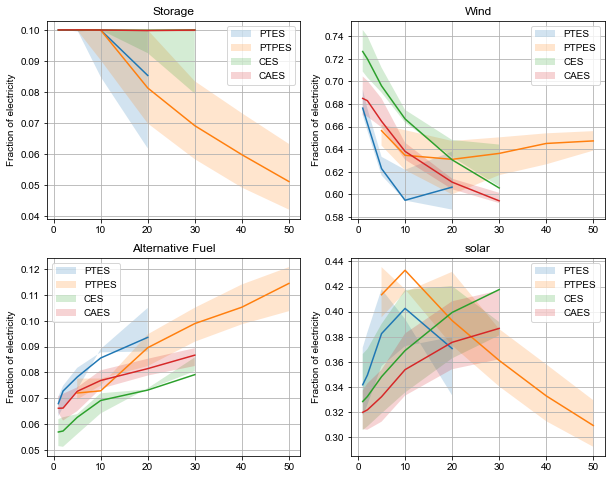

In [13]:
fig, axs = plt.subplots(2,2,figsize=(10,8))

fuel_cost=100
A=PumpedThermalS.loc[PumpedThermalS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['discharge.1'][A.effi==p[1]]/876000
y1=A['discharge.1'][A.effi==p[0]]/876000
y2=A['discharge.1'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[0,0].plot(x,a)
axs[0,0].fill_between(x,y1,y2,alpha=0.2, label='PTES')


A=MoltenS.loc[MoltenS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['discharge.1'][A.effi==p[1]]/876000
y1=A['discharge.1'][A.effi==p[0]]/876000
y2=A['discharge.1'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[0,0].plot(x,a)
axs[0,0].fill_between(x,y1,y2,alpha=0.2, label='PTPES')
    

A=LiquidAirS.loc[LiquidAirS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['discharge.1'][A.effi==p[1]]/876000
y1=A['discharge.1'][A.effi==p[0]]/876000
y2=A['discharge.1'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[0,0].plot(x,a)
axs[0,0].fill_between(x,y1,y2,alpha=0.2, label='CES')
    

A=CompressedS.loc[CompressedS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['discharge.1'][A.effi==p[1]]/876000
y1=A['discharge.1'][A.effi==p[0]]/876000
y2=A['discharge.1'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[0,0].plot(x,a)
axs[0,0].fill_between(x,y1,y2,alpha=0.2, label='CAES')
    
    


axs[0,0].legend()
axs[0,0].grid()
#axs[0,0].set_xlabel('Alternative Fuel cost ($/MWh_thermal)')
axs[0,0].set_ylabel('Fraction of electricity')
axs[0,0].set_title('Storage')

########################

A=PumpedThermalS.loc[PumpedThermalS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['wind'][A.effi==p[1]]/876000
y1=A['wind'][A.effi==p[0]]/876000
y2=A['wind'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[0,1].plot(x,a)
axs[0,1].fill_between(x,y1,y2,alpha=0.2, label='PTES')


A=MoltenS.loc[MoltenS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['wind'][A.effi==p[1]]/876000
y1=A['wind'][A.effi==p[0]]/876000
y2=A['wind'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[0,1].plot(x,a)
axs[0,1].fill_between(x,y1,y2,alpha=0.2, label='PTPES')
    

A=LiquidAirS.loc[LiquidAirS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['wind'][A.effi==p[1]]/876000
y1=A['wind'][A.effi==p[0]]/876000
y2=A['wind'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[0,1].plot(x,a)
axs[0,1].fill_between(x,y1,y2,alpha=0.2, label='CES')
    

A=CompressedS.loc[CompressedS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['wind'][A.effi==p[1]]/876000
y1=A['wind'][A.effi==p[0]]/876000
y2=A['wind'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[0,1].plot(x,a)
axs[0,1].fill_between(x,y1,y2,alpha=0.2, label='CAES')
    
axs[0,1].legend()
axs[0,1].grid()
#axs[0,0].set_xlabel('Alternative Fuel cost ($/MWh_thermal)')
axs[0,1].set_ylabel('Fraction of electricity')
axs[0,1].set_title('Wind')

#####################################################


A=PumpedThermalS.loc[PumpedThermalS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['solar'][A.effi==p[1]]/876000
y1=A['solar'][A.effi==p[0]]/876000
y2=A['solar'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[1,1].plot(x,a)
axs[1,1].fill_between(x,y1,y2,alpha=0.2, label='PTES')


A=MoltenS.loc[MoltenS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['solar'][A.effi==p[1]]/876000
y1=A['solar'][A.effi==p[0]]/876000
y2=A['solar'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[1,1].plot(x,a)
axs[1,1].fill_between(x,y1,y2,alpha=0.2, label='PTPES')
    

A=LiquidAirS.loc[LiquidAirS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['solar'][A.effi==p[1]]/876000
y1=A['solar'][A.effi==p[0]]/876000
y2=A['solar'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[1,1].plot(x,a)
axs[1,1].fill_between(x,y1,y2,alpha=0.2, label='CES')
    

A=CompressedS.loc[CompressedS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['solar'][A.effi==p[1]]/876000
y1=A['solar'][A.effi==p[0]]/876000
y2=A['solar'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[1,1].plot(x,a)
axs[1,1].fill_between(x,y1,y2,alpha=0.2, label='CAES')
    
axs[1,1].legend()
axs[1,1].grid()
#axs[0,0].set_xlabel('Alternative Fuel cost ($/MWh_thermal)')
axs[1,1].set_ylabel('Fraction of electricity')
axs[1,1].set_title('solar')

#########################################



A=PumpedThermalS.loc[PumpedThermalS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['Gasuse'][A.effi==p[1]]/876000
y1=A['Gasuse'][A.effi==p[0]]/876000
y2=A['Gasuse'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[1,0].plot(x,a)
axs[1,0].fill_between(x,y1,y2,alpha=0.2, label='PTES')


A=MoltenS.loc[MoltenS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['Gasuse'][A.effi==p[1]]/876000
y1=A['Gasuse'][A.effi==p[0]]/876000
y2=A['Gasuse'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[1,0].plot(x,a)
axs[1,0].fill_between(x,y1,y2,alpha=0.2, label='PTPES')
    

A=LiquidAirS.loc[LiquidAirS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['Gasuse'][A.effi==p[1]]/876000
y1=A['Gasuse'][A.effi==p[0]]/876000
y2=A['Gasuse'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[1,0].plot(x,a)
axs[1,0].fill_between(x,y1,y2,alpha=0.2, label='CES')
    

A=CompressedS.loc[CompressedS.fuel_cost==fuel_cost,:]
p=np.unique(A.effi)
a=A['Gasuse'][A.effi==p[1]]/876000
y1=A['Gasuse'][A.effi==p[0]]/876000
y2=A['Gasuse'][A.effi==p[2]]/876000
x=A.energy[A.effi==p[1]]/1000
axs[1,0].plot(x,a)
axs[1,0].fill_between(x,y1,y2,alpha=0.2, label='CAES')
    
axs[1,0].legend()
axs[1,0].grid()
#axs[0,0].set_xlabel('Alternative Fuel cost ($/MWh_thermal)')
axs[1,0].set_ylabel('Fraction of electricity')
axs[1,0].set_title('Alternative Fuel')